<a href="https://colab.research.google.com/github/Lenguist/insight-game-ai/blob/main/simple_sim_united.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description moved to readme

# Simulation code (with Markov assumption)

In [ ]:
"""
Markov assumption states that the past doesn't affect the present - all information relevant to decision making is contained in the "state"
To this end we will modify our original agents to have access to state rather than history
State will encapsulate the current impatience, and the current
"""

'\nMarkov assumption states that the past doesn\'t affect the present - all information relevant to decision making is contained in the "state"\nTo this end we will modify our original agents to have access to state rather than history\nState will encapsulate the current impatience, and the current\n'

In [ ]:
from sellers import DescentByNSeller
from simulation import simulation

imp_list = [i / 10.0 for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 50
rounds = 10000
n = 1
sim_results = []
seller = DescentByNSeller(value=value, imp_init=0, init_offer=range_max, descent=n)
for imp_incr in imp_list:
  result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  sim_results.append(result)

all_results.append(sim_results)

In [ ]:
from sellers import RandomSeller

random_results = []
seller = RandomSeller(value=value, imp_init=0, init_offer=range_max)
for imp_incr in imp_list:
  result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  random_results.append(result)

In [ ]:
arithmetic_results = []
n = 20
seller = DescentArithmeticSeller(value=value, imp_init=0, init_offer=range_max, init_descent = n)
for imp_incr in imp_list:
  result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  arithmetic_results.append(result)

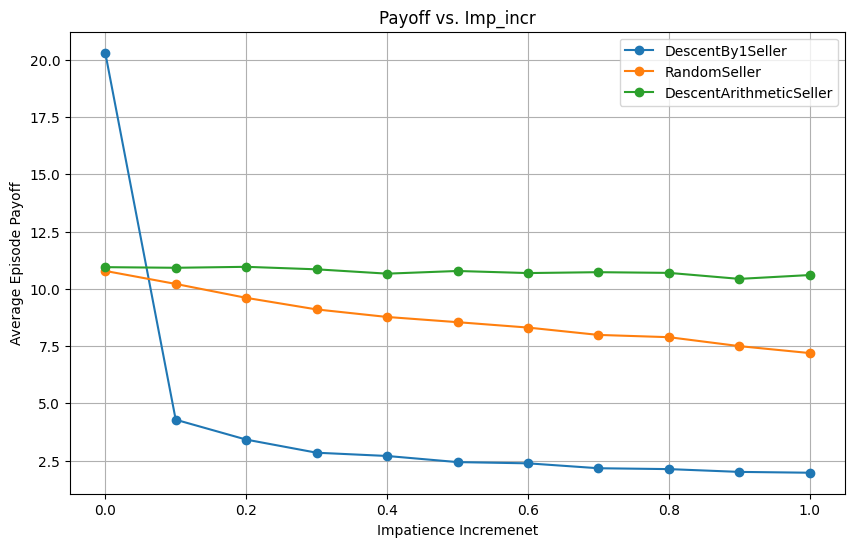

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(len(all_results)):
  plt.plot(imp_list, all_results[i], marker='o', label=f'DescentBy{i+1}Seller')
plt.plot(imp_list, random_results, marker='o', label=f'RandomSeller')
plt.plot(imp_list, arithmetic_results, marker='o', label=f'DescentArithmeticSeller')
plt.title('Payoff vs. Imp_incr')
plt.xlabel('Impatience Incremenet')
plt.ylabel('Average Episode Payoff')
plt.grid()

plt.legend()  # This will create a legend using the labels specified in the plot functions

plt.show()

# Simulation code (only know # of turns)


In [2]:
"""
Markov assumption states that the past doesn't affect the present - all information relevant to decision making is contained in the "state"
To this end we will modify our original agents to have access to state rather than history
State will encapsulate the current impatience, and the current
"""

'\nMarkov assumption states that the past doesn\'t affect the present - all information relevant to decision making is contained in the "state"\nTo this end we will modify our original agents to have access to state rather than history\nState will encapsulate the current impatience, and the current\n'

In [18]:
import random
class Buyer(object):
    def __init__(self, maxprice, imp_init, imp_incr):
        self.maxprice = maxprice
        self.imp = imp_init
        self.imp_incr = imp_incr
    def check_offer(self, offer):
      random_number = random.uniform(0, 1)
      if random_number <= self.imp:
        return "walk away"
      elif offer <= self.maxprice:
        return "accept offer"
      else:
        self.imp += self.imp_incr
        return "reject but continue"

In [19]:
class Seller(object):
  def __init__(self, value, imp_init, init_offer):
    self.value = value
    self.init_offer = init_offer
    self.state = {"last-offer": self.init_offer, "offers-made":0} # initial state
  def make_offer(self):
    raise NotImplementedError("Subclasses should implement this method.")
  def reset_state(self):
    self.state = {"last-offer":self.init_offer, "offers-made":0}

class RandomSeller(Seller):
  def make_offer(self):
    offer = int(random.uniform(value+1, self.state["last-offer"])) # return random offer
    return offer

class DescentByOneSeller(Seller):
  def make_offer(self):
    offer = self.state["last-offer"]-1
    return offer

class UserInputSeller(Seller):
 def make_offer(self):
  offer = int(input("You: "))
  return offer

In [20]:
class Episode(object):
  def __init__(self, buyer, seller, verbose=True):
    self.buyer = buyer
    self.seller = seller
    self.verbose = verbose # whether to print info

  def negotiation_round(self):
    if self.verbose:
      print(f"Curr state: {self.seller.state}")

    offer = self.seller.make_offer()
    decision = self.buyer.check_offer(offer)
    new_state = {"last-offer":offer, "offers-made":self.seller.state["offers-made"]+1}
    self.seller.state = new_state

    if self.verbose:
      print(f"Seller made offer of {offer}. The buyer decided to {decision}")
    return decision

  def run_episode(self):
    decision = ""
    while decision != "walk away" and decision != "accept offer":
      decision = self.negotiation_round()

    if decision == "accept offer":
      final_offer = self.seller.state["last-offer"]
      profit = final_offer - self.seller.value
      if self.verbose:
        print(f"Deal made at {final_offer}")
        print(f"Buyer's max_price was {self.buyer.maxprice}")

    else:
      if self.verbose:
        print(f"No deal made - no profit.")
        print(f"Buyer's max_price was {self.buyer.maxprice}")
      profit = 0
    # reset seller state
    self.seller.reset_state()
    return profit

In [21]:
def simulation(value, range_min, range_max, imp_incr, imp_init, rounds, seller, verbose=False):
  total_profit = 0
  round_cnt = 0
  for i in range(rounds):
    maxprice = int(random.uniform(range_min, range_max+1))
    buyer = Buyer(maxprice, imp_init, imp_incr)
    episode = Episode(buyer, seller, verbose=verbose)
    profit = episode.run_episode()
    total_profit += profit
  average_return = total_profit/rounds
  return average_return

In [22]:
def random_imp_simulation(value, range_min, range_max, rounds, seller, verbose=False):
  # imp_init gonnna be 0 by default
  # imp_incr generated at random between 0 and 1
  total_profit = 0
  round_cnt = 0
  imp_init = 0
  imp_incr = random.choice([i / 10.0 for i in range(11)])
  for i in range(rounds):
    maxprice = int(random.uniform(range_min, range_max+1))
    buyer = Buyer(maxprice, imp_init, imp_incr)
    episode = Episode(buyer, seller, verbose=verbose)
    profit = episode.run_episode()
    total_profit += profit
  average_return = total_profit/rounds
  return average_return

In [30]:
import numpy as np
mean = random.choice([i / 10.0 for i in range(11)])
variance = 0.2
impatience = list(np.random.normal(mean, variance, 1))[0]
impatience

0.6429978184227747

In [31]:
def normal_imp_simulation(value, range_min, range_max, rounds, seller, verbose=False):
  # imp_init gonnna be 0 by default
  # imp_incr generated at random between 0 and 1
  mean = random.choice([i / 10.0 for i in range(11)])
  variance = 0.2
  total_profit = 0
  round_cnt = 0
  imp_init = 0
  for i in range(rounds):
    imp_incr = list(np.random.normal(mean, variance, 1))[0]
    maxprice = int(random.uniform(range_min, range_max+1))
    buyer = Buyer(maxprice, imp_init, imp_incr)
    episode = Episode(buyer, seller, verbose=verbose)
    profit = episode.run_episode()
    total_profit += profit
  average_return = total_profit/rounds
  return average_return

In [32]:
def normal_normal_simulation(value, range_min, range_max, rounds, seller, verbose=False):
  # choose middle at random, set variance the same
  # normal sample both maxprice and imp_init
  # benefits learningn agents
  # imp_init gonnna be 0 by default
  # imp_incr generated at random between 0 and 1
  total_profit = 0
  round_cnt = 0
  imp_init = 0
  imp_incr = random.choice([i / 10.0 for i in range(11)])
  for i in range(rounds):
    maxprice = int(random.uniform(range_min, range_max+1))
    buyer = Buyer(maxprice, imp_init, imp_incr)
    episode = Episode(buyer, seller, verbose=verbose)
    profit = episode.run_episode()
    total_profit += profit
  average_return = total_profit/rounds
  return average_return

In [33]:
def random_imp_simulation(value, range_min, range_max, rounds, seller, verbose=False):
  # imp_init gonnna be 0 by default
  # imp_incr generated at random between 0 and 1
  total_profit = 0
  round_cnt = 0
  imp_init = 0
  imp_incr = random.choice([i / 10.0 for i in range(11)])
  for i in range(rounds):
    maxprice = int(random.uniform(range_min, range_max+1))
    buyer = Buyer(maxprice, imp_init, imp_incr)
    episode = Episode(buyer, seller, verbose=verbose)
    profit = episode.run_episode()
    total_profit += profit
  average_return = total_profit/rounds
  return average_return

In [34]:
class Seller(object):
  def __init__(self, value, init_offer):
    self.value = value
    self.init_offer = init_offer
    self.state = {"last-offer": self.init_offer, "offers-made":0} # initial state
  def make_offer(self):
    raise NotImplementedError("Subclasses should implement this method.")
  def reset_state(self):
    self.state = {"last-offer":self.init_offer, "offers-made":0}

class RandomSeller(Seller):
  def make_offer(self):
    offer = int(random.uniform(value+1, self.state["last-offer"])) # return random offer
    return offer

class DescentByOneSeller(Seller):
  def make_offer(self):
    offer = self.state["last-offer"]-1
    return offer

class UserInputSeller(Seller):
 def make_offer(self):
  offer = int(input("You: "))
  return offer


class DescentByNSeller(Seller):
  def __init__(self, value, init_offer, descent):
    super().__init__(value, init_offer)
    self.descent = descent
  def make_offer(self):
    offer = self.state["last-offer"]-self.descent
    return offer

class DescentArithmeticSeller(Seller):
  def __init__(self, value, init_offer, init_descent):
    super().__init__(value, init_offer)
    self.init_descent = init_descent
    self.descent = init_descent
  def make_offer(self):
    offer = self.state["last-offer"]-max(self.descent,1)
    self.descent = self.descent-1
    return offer
  def reset_state(self):
    super().reset_state()
    self.descent = self.init_descent

In [35]:
imp_list = [i / 10.0 for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30
rounds = 10000
init_offer=range_max

# random agent
random_results = []
seller = RandomSeller(value=value, init_offer=init_offer)
for imp_incr in imp_list:
  result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  random_results.append(result)

# simple heuristic agent, consistently performs better than random
arithmetic_results = []
n = int((init_offer-value)/2)
seller = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
for imp_incr in imp_list:
  result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  arithmetic_results.append(result)

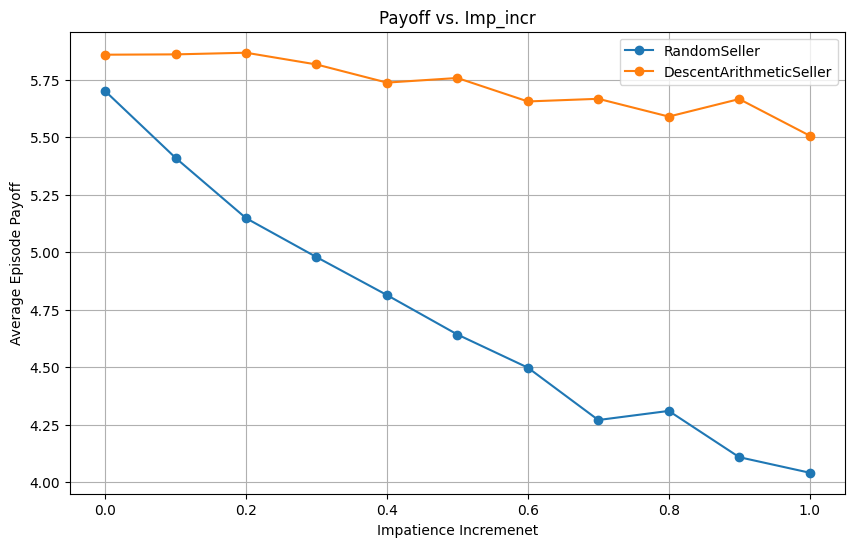

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(imp_list, random_results, marker='o', label=f'RandomSeller')
plt.plot(imp_list, arithmetic_results, marker='o', label=f'DescentArithmeticSeller')
plt.title('Payoff vs. Imp_incr')
plt.xlabel('Impatience Incremenet')
plt.ylabel('Average Episode Payoff')
plt.grid()

plt.legend()  # This will create a legend using the labels specified in the plot functions

plt.show()

In [37]:
imp_list = [i / 10.0 for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30
rounds = 10000
init_offer=range_max

# random agent
seller = RandomSeller(value=value, init_offer=init_offer)
random_results = random_imp_simulation(value,
                        range_min,
                        range_max,
                        rounds = rounds,
                        seller=seller)

# simple heuristic agent, consistently performs better than random
n = int((init_offer-value)/2)
seller = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
arithmetic_results = random_imp_simulation(value,
                        range_min,
                        range_max,
                        rounds = rounds,
                        seller=seller)

In [41]:
# random agent random impatience results
random_results

4.3037

In [42]:
# arithmetic agent random impatience result
arithmetic_results

5.504

In [55]:
mean_list = [i for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30
rounds = 100000
init_offer=range_max

# random agent
random_results = []
seller = RandomSeller(value=value, init_offer=init_offer)
for mean in mean_list:
  result = normal_imp_simulation(value,
                        range_min,
                        range_max,
                        mean = mean,
                        rounds = rounds,
                        seller=seller)
  random_results.append(result)

# simple heuristic agent, consistently performs better than random
arithmetic_results = []
n = int((init_offer-value)/2)
seller = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
for mean in mean_list:
  result = normal_imp_simulation(value,
                        range_min,
                        range_max,
                       mean = mean,
                        rounds = rounds,
                        seller=seller)
  arithmetic_results.append(result)

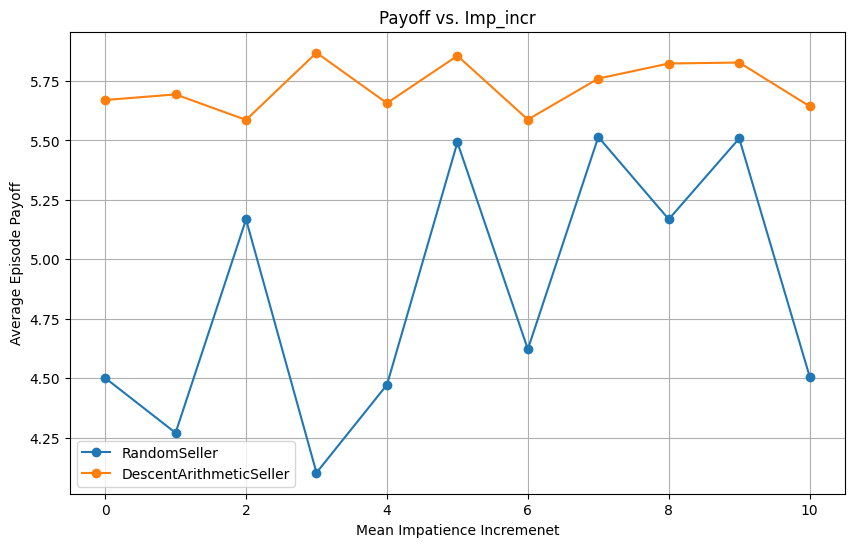

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mean_list, random_results, marker='o', label=f'RandomSeller')
plt.plot(mean_list, arithmetic_results, marker='o', label=f'DescentArithmeticSeller')
plt.title('Payoff vs. Imp_incr')
plt.xlabel('Mean Impatience Incremenet')
plt.ylabel('Average Episode Payoff')
plt.grid()

plt.legend()  # This will create a legend using the labels specified in the plot functions

plt.show()

In [50]:
def normal_imp_simulation(value, range_min, range_max, rounds, seller, mean, verbose=False):
  # imp_init gonnna be 0 by default
  # imp_incr generated at random between 0 and 1
  mean = random.choice([i / 10.0 for i in range(11)])
  #mean = mean
  variance = 0.2
  total_profit = 0
  round_cnt = 0
  imp_init = 0
  for i in range(rounds):
    imp_incr = list(np.random.normal(mean, variance, 1))[0]
    maxprice = int(random.uniform(range_min, range_max+1))
    buyer = Buyer(maxprice, imp_init, imp_incr)
    episode = Episode(buyer, seller, verbose=verbose)
    profit = episode.run_episode()
    total_profit += profit
  average_return = total_profit/rounds
  return average_return

In [58]:
# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30
rounds = 10
init_offer=range_max

arithmetic_results = []
n = int((init_offer-value)/2)
seller = UserInputSeller(value=value, init_offer=init_offer)

result = normal_imp_simulation(value,
                        range_min,
                        range_max,
                       mean = mean,
                        rounds = rounds,
                        seller=seller, verbose=True)

Curr state: {'last-offer': 30, 'offers-made': 0}
You: 28
Seller made offer of 28. The buyer decided to reject but continue
Curr state: {'last-offer': 28, 'offers-made': 1}
You: 27
Seller made offer of 27. The buyer decided to walk away
No deal made - no profit.
Buyer's max_price was 27
Curr state: {'last-offer': 30, 'offers-made': 0}
You: 29
Seller made offer of 29. The buyer decided to reject but continue
Curr state: {'last-offer': 29, 'offers-made': 1}
You: 28
Seller made offer of 28. The buyer decided to accept offer
Deal made at 28
Buyer's max_price was 28
Curr state: {'last-offer': 30, 'offers-made': 0}
You: 27
Seller made offer of 27. The buyer decided to accept offer
Deal made at 27
Buyer's max_price was 28
Curr state: {'last-offer': 30, 'offers-made': 0}
You: 26
Seller made offer of 26. The buyer decided to reject but continue
Curr state: {'last-offer': 26, 'offers-made': 1}
You: 25
Seller made offer of 25. The buyer decided to reject but continue
Curr state: {'last-offer': 25,

KeyboardInterrupt: ignored

# Two sellers

In [49]:
class Seller(object):
  def __init__(self, value, init_offer):
    self.value = value
    self.init_offer = init_offer
    self.state = {"last-offer": self.init_offer, "offers-made":0} # initial state
  def make_offer(self):
    raise NotImplementedError("Subclasses should implement this method.")
  def reset_state(self):
    self.state = {"last-offer":self.init_offer, "offers-made":0}

class RandomSeller(Seller):
  def make_offer(self):
    offer = int(random.uniform(value+1, self.state["last-offer"])) # return random offer
    return offer

class DescentByOneSeller(Seller):
  def make_offer(self):
    offer = self.state["last-offer"]-1
    return offer

class UserInputSeller(Seller):
 def make_offer(self):
  offer = int(input("You: "))
  return offer


class DescentByNSeller(Seller):
  def __init__(self, value, init_offer, descent):
    super().__init__(value, init_offer)
    self.descent = descent
  def make_offer(self):
    offer = self.state["last-offer"]-self.descent
    return offer

class DescentArithmeticSeller(Seller):
  def __init__(self, value, init_offer, init_descent):
    super().__init__(value, init_offer)
    self.init_descent = init_descent
    self.descent = init_descent
  def make_offer(self):
    offer = self.state["last-offer"]-max(self.descent,1)
    self.descent = self.descent-1
    return offer
  def reset_state(self):
    super().reset_state()
    self.descent = self.init_descent